In [1]:
from os import listdir
from os.path import isfile, join
# from Utils import Load, Write
import pandas as pd
import numpy as np
from scipy import stats
# import math
import re
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
# from matplotlib import cm
# import plotly.plotly as py
from myplots import roundup, rounddown, find_decimal_fold, percentile_cut_off, rarefaction_calc, rarefaction_plot
from matplotlib.ticker import FormatStrFormatter
import cPickle as pickle
from Bio.SeqUtils import GC
from collections import Counter
import myplots
from myplots import calc_sig_corr
import os
from queue.qp import qp,fakeqp
from addloglevels import sethandlers
import logging 
from Utils import cacheOnDisk


In [2]:
print 'dfs'

dfs


In [2]:
def get_sample_data(sample_name, generate_dfs): 
## this function generates dfs (general, only productive and only non productive) for each sample, and save
## as pickles. alternatively, it loads these dfs from pickles. 
    
    print 'getting sample data...'
    
    if generate_dfs:
        print 'generating'
        sample_df=pd.read_table("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/%s.tsv" %sample_name)  
        sample_df_prod = sample_df[sample_df['sequenceStatus'] == 'In']
        sample_df_non_prod = sample_df[sample_df['sequenceStatus'] != 'In']
        
        pickle.dump(sample_df, open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/Pickles/sample_df_%s' %sample_name, "wb"))
        pickle.dump(sample_df_prod, open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/Pickles/sample_df_prod_%s' %sample_name, "wb"))
        pickle.dump(sample_df_non_prod, open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/Pickles/sample_df_non_prod_%s' %sample_name, "wb"))
    else:
        print 'loading'
        sample_df= pickle.load( open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/Pickles/sample_df_%s' %sample_name,"rb" ))
        sample_df_prod= pickle.load( open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/Pickles/sample_df_prod_%s' %sample_name,"rb" ))
        sample_df_non_prod= pickle.load( open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/Pickles/sample_df_non_prod_%s' %sample_name,"rb" ))
    
    print 'finished getting sample data'
    return sample_df, sample_df_prod, sample_df_non_prod


# sampling 2500 random sequences from each prod/non prod sample:

only samples that have 2500 or more non-productive samples were used for the analysis (460 samples out of 587).
the analysis was repeated twice and averaged. no siginificant differences between replicates were seen. 

In [69]:
def unique_aa(df, **kwargs):
    list_aa=list(df['aminoAcid'])
    list_aa_new=[i for i in list_aa if isinstance(i, str)]
    unique_aas=list(set(list_aa_new))
    n_seq_aa=len(unique_aas)
    return n_seq_aa,unique_aas

In [70]:
def count_aa_with_sampling(unique_aas, total_unique_aa, sample_name):
    
    sampled_aa_list=list(np.random.choice(unique_aas, 2500, replace=False))  
    total_unique_aa=total_unique_aa+sampled_aa_list
    return total_unique_aa

In [71]:
def aa_counter(total_unique_aa):
    print'counting aa sequence occurence number...'
    aa_seq_counter_dic=Counter(total_unique_aa)
    print'finished counting aa sequence occurence number...'
    return aa_seq_counter_dic 
    

    
    

In [81]:
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/Pickles/combined_res_with_tags_df_08032017', 'rb') as f:
    combined_res_with_tags_df_08032017=pickle.load(f)
f.close()


In [83]:
combined_res_with_tags_df_08032017.loc['HIP05444','unique_aa_n_df_0']

301203.0

In [ ]:
combined_res_with_tags_df_08032017['unique_aa_n_df_1'].describe()

In [ ]:
print len(combined_res_with_tags_df_08032017[combined_res_with_tags_df_08032017['unique_aa_n_df_1']>2500])
print float(len(combined_res_with_tags_df_08032017[combined_res_with_tags_df_08032017['unique_aa_n_df_1']>2500]))/573

In [ ]:
more2000=list(combined_res_with_tags_df_08032017[combined_res_with_tags_df_08032017['unique_aa_n_df_1']>2000].index)

In [12]:
def get_sample_list():
    sample_list=[f for f in listdir("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data") if isfile(join("/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data", f))]
    sample_list = [sample for sample in sample_list if sample.startswith ('HIP')]
    sample_list=[s.replace(".tsv", "") for s in sample_list]
    
    return sample_list


In [66]:
sample_list=get_sample_list()
sample_list

['HIP05444',
 'HIP17585',
 'HIP14020',
 'HIP01870',
 'HIP00707',
 'HIP03505',
 'HIP14213',
 'HIP05398',
 'HIP01140',
 'HIP13396',
 'HIP03502',
 'HIP04509',
 'HIP14103',
 'HIP04480',
 'HIP17760',
 'HIP14214',
 'HIP00819',
 'HIP13967',
 'HIP13515',
 'HIP03381',
 'HIP02962',
 'HIP13263',
 'HIP10376',
 'HIP02848',
 'HIP14055',
 'HIP01805',
 'HIP02103',
 'HIP13754',
 'HIP03111',
 'HIP13831',
 'HIP01582',
 'HIP15854',
 'HIP05838',
 'HIP00775',
 'HIP12900',
 'HIP13782',
 'HIP14176',
 'HIP05960',
 'HIP00999',
 'HIP00934',
 'HIP01470',
 'HIP00825',
 'HIP10564',
 'HIP13803',
 'HIP13766',
 'HIP14192',
 'HIP14143',
 'HIP17845',
 'HIP03814',
 'HIP04532',
 'HIP14060',
 'HIP08223',
 'HIP14138',
 'HIP10447',
 'HIP13920',
 'HIP00822',
 'HIP03233',
 'HIP15861',
 'HIP00169',
 'HIP02873',
 'HIP14221',
 'HIP05552',
 'HIP14136',
 'HIP13478',
 'HIP13983',
 'HIP13256',
 'HIP01219',
 'HIP14015',
 'HIP13309',
 'HIP11613',
 'HIP13871',
 'HIP14226',
 'HIP19716',
 'HIP17837',
 'HIP17445',
 'HIP13929',
 'HIP13157',

In [67]:
print len(sample_list)

587


In [ ]:
basePath='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/public_with_2500_seqs' ## define the path to 

In [28]:
## this function tests if the sample has more than 2500 non productive sequences. 
## if it does, it extracts 2500 productive and 2500 non-productive unique random aa sequences. 
## it also saves these lists in pickles
def extracting_unique_aas(min_sample,max_sample,rep_n):

    #n_samples=3
    #sample_list= get_sample_list()
    total_unique_aa_prod_sampling=[]
    total_unique_aa_non_prod_sampling=[]
    count_participating_samples=0
    if max_sample>587:
        max_sample=587
    for sample_name in sample_list[min_sample:max_sample]:
        print sample_name
        #print 'getting non prod data...'
        with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/Pickles/sample_df_non_prod_%s' %sample_name,"rb" ) as f:
            sample_df_non_prod= pickle.load(f)
        f.close()
        n_seq_aa_non_prod,unique_aas_non_prod=unique_aa(sample_df_non_prod)

        if n_seq_aa_non_prod>=2500:
            print n_seq_aa_non_prod
            #print ' getting prod data'
            with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/Pickles/sample_df_prod_%s' %sample_name,"rb" ) as f:
                sample_df_prod= pickle.load(f)
            f.close()
            n_seq_aa_prod,unique_aas_prod=unique_aa(sample_df_prod)
            #print('adding unique aas from sample %s...' %sample_name)
            total_unique_aa_prod_sampling=count_aa_with_sampling(unique_aas_prod,total_unique_aa_prod_sampling, sample_name)
            total_unique_aa_non_prod_sampling=count_aa_with_sampling(unique_aas_non_prod,total_unique_aa_non_prod_sampling, sample_name)
            count_participating_samples+=1
        else:
            print ('sample %s has only %s unique aa non-prod sequences' %(sample_name, n_seq_aa_non_prod))
    
    with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/Pickles/total_unique_aa_prod_sampling_%s' %rep_n,"wb" ) as f:
        pickle.dump(total_unique_aa_prod_sampling,f)
    f.close()
    with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/Pickles/total_unique_aa_non_prod_sampling_%s' %rep_n,"wb" ) as f:
        pickle.dump(total_unique_aa_non_prod_sampling,f)
    f.close()
    
  
    return total_unique_aa_prod_sampling,total_unique_aa_non_prod_sampling,count_participating_samples
        
        
        


        
    
    
    
    
       

In [ ]:
total_unique_aa_prod_sampling,total_unique_aa_non_prod_sampling=extracting_unique_aas(4,7)

In [ ]:
print len(total_unique_aa_non_prod_sampling)

In [ ]:
sample_name='HIP00707'
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/Pickles/sample_df_non_prod_%s' %sample_name,"rb" ) as f:
    sample_df_non_prod= pickle.load(f)
f.close()
n_seq_aa_non_prod,unique_aas_non_prod=unique_aa(sample_df_non_prod)

if n_seq_aa_non_prod>=2500:
    print n_seq_aa_non_prod
    #print ' getting prod data'
    with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/Pickles/sample_df_prod_%s' %sample_name,"rb" ) as f:
        sample_df_prod= pickle.load(f)
    f.close()

In [10]:
basePath2='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/public_with_2500_seqs_repeat' ## define the path to 

In [12]:
rep_n=1

In [29]:
@cacheOnDisk(basePath=basePath2, filename='grouped_counter_%s' %rep_n, force=True)
def calculate_n_samples_per_seq(rep_n):
    print ('extracting unique aa lists from rep #%s...' %rep_n)
    total_unique_aa_prod_sampling,total_unique_aa_non_prod_sampling,count_participating_samples=extracting_unique_aas(0,587,rep_n)   
    print ('# participating samples in %s are %s' %(rep_n, count_participating_samples))   
    print ('counting n_samples for productive sequences from rep #%s...' %rep_n)
    prod_aa_seq_counter_dic=aa_counter(total_unique_aa_prod_sampling)
    prod_aa_seq_counter_df=pd.DataFrame(prod_aa_seq_counter_dic.items(), columns=['aa_sequence', 'n_samples'])
    prod_aa_seq_counter_df_grouped=prod_aa_seq_counter_df.groupby(['n_samples']).count()
    print ('counting n_samples for non-productive sequences from rep #%s...' %rep_n)
    non_prod_aa_seq_counter_dic=aa_counter(total_unique_aa_non_prod_sampling)
    non_prod_aa_seq_counter_df=pd.DataFrame(non_prod_aa_seq_counter_dic.items(), columns=['aa_sequence', 'n_samples'])
    non_prod_aa_seq_counter_df_grouped=non_prod_aa_seq_counter_df.groupby(['n_samples']).count()
    print ('Finished calculating n_samples for rep #%s...' %rep_n)
    return prod_aa_seq_counter_df_grouped,non_prod_aa_seq_counter_df_grouped,count_participating_samples

In [30]:
##call the function who calculates numbers of shared samples per sequence for all samples, on 2500 sequences from each sample
## this function is called 10 times, and generate 10 dfs, which should be united, and averaged. 



sethandlers()
os.chdir(basePath2)
## the inputs for qp are: jobname, q=machine list, *** add max_r to prevent exploding the cluster!!***
with qp('public2500repeats_job',  q = ['himem7.q','16g.q'], mem_def="10G", trds_def=2, deleteCSHwithnoerr = True, tryrerun = False, max_u=120) as q:
    q.startpermanentrun()
    wait_on =[]
    
##now define a loop that divide the job and send each part seperately:
## consider making a list of integer for the min/max_seq so the first jobs will be shorter than the last ones. 
    rep_n=1
    while  rep_n<11:                                     
        print rep_n
        wait_on.append(q.method(calculate_n_samples_per_seq,kwargs={'rep_n':rep_n}))
            ##q.method takes the desired function with its arguments and send it to the queue.
        rep_n= rep_n+1
    q.wait(wait_on)

1
2
3
4
5
6
7
8
9
10
2017-04-02 11:46:40,930 - qp - INFO - Sending to queue (mem 10G, threads 2): python2.7 -W ignore /home/sbenari/workspace/lib/queue/qworker.py public2500repeats_job_adfd67678253409391282ecbc05a10ca/0.dat;
2017-04-02 11:47:11,774 - qp - INFO - Sending to queue (mem 10G, threads 2): python2.7 -W ignore /home/sbenari/workspace/lib/queue/qworker.py public2500repeats_job_adfd67678253409391282ecbc05a10ca/1.dat;
2017-04-02 11:47:39,917 - qp - INFO - Sending to queue (mem 10G, threads 2): python2.7 -W ignore /home/sbenari/workspace/lib/queue/qworker.py public2500repeats_job_adfd67678253409391282ecbc05a10ca/2.dat;
2017-04-02 11:47:39,965 - qp - INFO - Sending to queue (mem 10G, threads 2): python2.7 -W ignore /home/sbenari/workspace/lib/queue/qworker.py public2500repeats_job_adfd67678253409391282ecbc05a10ca/3.dat;
2017-04-02 11:47:40,038 - qp - INFO - Sending to queue (mem 10G, threads 2): python2.7 -W ignore /home/sbenari/workspace/lib/queue/qworker.py public2500repeats_job

### merging the duplicate dfs, calculating statistics and plotting:

In [3]:
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/public_with_2500_seqs_repeat/calculate_n_samples_per_seq/grouped_counter_1',"rb" ) as f:
    prod_aa_seq_counter1_df_grouped,non_prod_aa_seq_counter1_df_grouped=pickle.load(f)
f.close()


In [4]:
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/public_with_2500_seqs_repeat/calculate_n_samples_per_seq/grouped_counter_11',"rb" ) as f:
    prod_aa_seq_counter11_df_grouped,non_prod_aa_seq_counter11_df_grouped,count_participating_samples11 =pickle.load(f)
f.close()


In [5]:
count_participating_samples11

460

In [6]:
prod_aa_seq_counterAll_df_grouped=pd.merge(prod_aa_seq_counter1_df_grouped,prod_aa_seq_counter11_df_grouped,how='outer',
                                           left_index=True, right_index=True)

In [24]:
non_prod_aa_seq_counterAll_df_grouped=pd.merge(non_prod_aa_seq_counter1_df_grouped,non_prod_aa_seq_counter11_df_grouped,how='outer',
                                           left_index=True, right_index=True)

In [26]:
non_prod_aa_seq_counterAll_df_grouped.head()

,aa_sequence_x,aa_sequence_y
n_samples,,
1,1094204.0,1094256.0
2,15301.0,15330.0
3,3199.0,3203.0
4,1154.0,1135.0
5,528.0,536.0


In [8]:
prod_aa_seq_counterAll_df_grouped = prod_aa_seq_counterAll_df_grouped.rename(columns={'aa_sequence_x':'aa_sequence_rep1',
                                                                                      'aa_sequence_y': 'aa_sequence_rep11'})

In [27]:
non_prod_aa_seq_counterAll_df_grouped = non_prod_aa_seq_counterAll_df_grouped.rename(columns={'aa_sequence_x':'aa_sequence_rep1',
                                                                                      'aa_sequence_y': 'aa_sequence_rep11'})

In [16]:
prod_aa_seq_counterAll_df_grouped['mean']=prod_aa_seq_counterAll_df_grouped.mean(axis=1)

In [28]:
non_prod_aa_seq_counterAll_df_grouped['mean']=non_prod_aa_seq_counterAll_df_grouped.mean(axis=1)

In [20]:
prod_aa_seq_counterAll_df_grouped=prod_aa_seq_counterAll_df_grouped.round(0)

In [29]:
non_prod_aa_seq_counterAll_df_grouped=non_prod_aa_seq_counterAll_df_grouped.round(0)

In [22]:
prod_aa_seq_counterAll_df_grouped=prod_aa_seq_counterAll_df_grouped.replace(np.nan,0)

In [30]:
non_prod_aa_seq_counterAll_df_grouped=non_prod_aa_seq_counterAll_df_grouped.replace(np.nan,0)

In [31]:
prod_aa_seq_counterAll_df_grouped.head()

,aa_sequence_rep1,aa_sequence_rep11,mean
n_samples,,,
1,990229.0,991015.0,990622.0
2,43688.0,43656.0,43672.0
3,11173.0,11039.0,11106.0
4,4217.0,4310.0,4264.0
5,1940.0,1891.0,1916.0


In [33]:
non_prod_aa_seq_counterAll_df_grouped

,aa_sequence_rep1,aa_sequence_rep11,mean
n_samples,,,
1,1094204.0,1094256.0,1094230.0
2,15301.0,15330.0,15316.0
3,3199.0,3203.0,3201.0
4,1154.0,1135.0,1144.0
5,528.0,536.0,532.0
6,298.0,290.0,294.0
7,186.0,206.0,196.0
8,127.0,97.0,112.0
9,91.0,89.0,90.0


In [34]:
non_prod_aa_seq_counterAll_df_grouped['mean'].sum()

1115354.0

In [45]:
prod_aa_seq_counterAll_df_grouped['mean'].sum()

1053339.0

In [41]:
non_prod_aa_seq_counterAll_df_grouped.index.max()

104

In [47]:
prod_aa_seq_counterAll_df_grouped.index.max()

18

In [48]:
prod_aa_seq_counterAll_df_grouped['weighted mean']=prod_aa_seq_counterAll_df_grouped['mean']*prod_aa_seq_counterAll_df_grouped.index

In [49]:
prod_aa_seq_counterAll_df_grouped

,aa_sequence_rep1,aa_sequence_rep11,mean,weighted mean
n_samples,,,,
1,990229.0,991015.0,990622.0,990622.0
2,43688.0,43656.0,43672.0,87344.0
3,11173.0,11039.0,11106.0,33318.0
4,4217.0,4310.0,4264.0,17056.0
5,1940.0,1891.0,1916.0,9580.0
6,918.0,927.0,922.0,5532.0
7,464.0,411.0,438.0,3066.0
8,240.0,221.0,230.0,1840.0
9,95.0,90.0,92.0,828.0


In [50]:
non_prod_aa_seq_counterAll_df_grouped['weighted mean']=non_prod_aa_seq_counterAll_df_grouped['mean']*non_prod_aa_seq_counterAll_df_grouped.index

In [52]:
prod_aa_seq_counterAll_df_grouped['weighted mean'].sum()/prod_aa_seq_counterAll_df_grouped['mean'].sum()

1.0917805189022718

In [53]:
non_prod_aa_seq_counterAll_df_grouped['weighted mean'].sum()/non_prod_aa_seq_counterAll_df_grouped['mean'].sum()

1.0313963100504413

In [55]:
100-((prod_aa_seq_counterAll_df_grouped.loc[1,'mean']/prod_aa_seq_counterAll_df_grouped['mean'].sum())*100)

5.9541135379967898

In [56]:
100-((non_prod_aa_seq_counterAll_df_grouped.loc[1,'mean']/non_prod_aa_seq_counterAll_df_grouped['mean'].sum())*100)

1.8939278471229812

In [57]:
all_seq_non_prod=non_prod_aa_seq_counterAll_df_grouped['mean'].sum()

In [58]:
more10=non_prod_aa_seq_counterAll_df_grouped[non_prod_aa_seq_counterAll_df_grouped.index>46]['mean'].sum()

In [59]:
more10

6.0

In [60]:
(more10/all_seq_non_prod)*100

0.00053794580016748041

In [35]:
460.0/587

0.7836456558773425

In [37]:
prod_n_samples=prod_aa_seq_counterAll_df_grouped.index
prod_public_counter=prod_aa_seq_counterAll_df_grouped['mean']
non_prod_n_samples=non_prod_aa_seq_counterAll_df_grouped.index
non_prod_public_counter=non_prod_aa_seq_counterAll_df_grouped['mean']


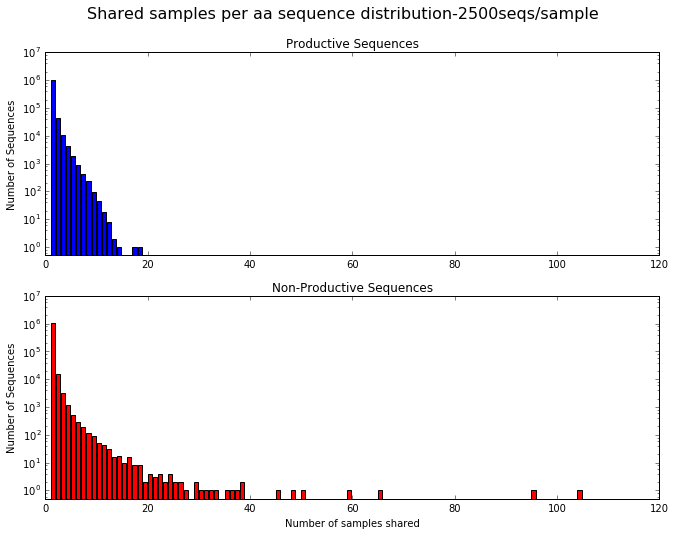

In [46]:
fig=plt.figure(figsize=(11,8))
plt.suptitle('Shared samples per aa sequence distribution-2500seqs/sample', fontsize=16)
plt.subplot(2,1,1)
plt.bar(prod_n_samples,prod_public_counter, color='blue')
plt.yscale('log')
plt.ylim(0.5,10**7)
plt.xlim(0,120)
plt.title('Productive Sequences')
plt.ylabel('Number of Sequences')
plt.subplot(2,1,2)
plt.bar(non_prod_n_samples,non_prod_public_counter, color='red')
plt.yscale('log')
plt.ylim(0.5,10**7)
plt.xlim(0,120)
plt.title('Non-Productive Sequences')
plt.xlabel('Number of samples shared')
plt.ylabel('Number of Sequences')
filename='public_dist_2500seqSample_fig'
fig.savefig(filename, bbox_inches='tight', dpi = 800)

plt.show()

# rarefaction plot-mean number of shared samples per sequence as a function of number of samples tested

sample increasing number of samples each time, and calculate the number of shared samples per sequence (or percent public) as a function of number of samples tested:


In [62]:
prod_aa_seq_counter_df.head()

NameError: name 'prod_aa_seq_counter_df' is not defined

# generating dfs that contains all unique aa sequences with sample names, for all productive and non productive sequences

In [155]:
basePath='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/unique_aa_seq_df_all_samples'
#Z:\Lab\Personal\ShaniBAF\TCR_demo_data\public_analysis\unique_aa_seq_df_all_samples

In [163]:
@cacheOnDisk(basePath=basePath, filename='gen_aa_seq_df_%(min_sample)s_%(max_sample)s', force=True)
def gen_aa_seq_df(min_sample,max_sample):
    if max_sample>587:
        max_sample=587
    non_prod_aa_seq_df_list=[]
    prod_aa_seq_df_list=[]
    
    for sample_name in sample_list[min_sample:max_sample]:
        print sample_name
        print ('getting non prod data for sample %s...' %sample_name)
        with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/Pickles/sample_df_non_prod_%s' %sample_name,"rb" ) as f:
            sample_df_non_prod= pickle.load(f)
        f.close()
        n_seq_aa_non_prod,unique_aas_non_prod=unique_aa(sample_df_non_prod)
        non_prod_aa_seq_df=pd.DataFrame({'aa sequence': unique_aas_non_prod})
        non_prod_aa_seq_df['Sample']=sample_name
        non_prod_aa_seq_df.reset_index(inplace=1)
        print ('getting prod data for sample %s...' %sample_name)
        with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/Pickles/sample_df_prod_%s' %sample_name,"rb" ) as f:
            sample_df_prod= pickle.load(f)
        f.close()
        n_seq_aa_prod,unique_aas_prod=unique_aa(sample_df_prod)
        prod_aa_seq_df=pd.DataFrame({'aa sequence': unique_aas_prod})
        prod_aa_seq_df['Sample']=sample_name
        prod_aa_seq_df.reset_index(inplace=1)
        non_prod_aa_seq_df_list.append(non_prod_aa_seq_df)
        prod_aa_seq_df_list.append(prod_aa_seq_df)
    prod_aa_seq_total_df=pd.concat(prod_aa_seq_df_list)
    non_prod_aa_seq_total_df=pd.concat(non_prod_aa_seq_df_list)
    
    return prod_aa_seq_total_df,non_prod_aa_seq_total_df
    

In [164]:
sethandlers()
os.chdir(basePath)
## the inputs for qp are: jobname, q=machine list, *** add max_r to prevent exploding the cluster!!***
with qp('gen_aa_seq_df_job',  q = ['himem7.q','16g.q'], mem_def="10G", trds_def=2, deleteCSHwithnoerr = True, tryrerun = False, max_u=120) as q:
    q.startpermanentrun()
    wait_on =[]
    
##now define a loop that divide the job and send each part seperately:

    min_sample=0
    max_sample=20 
    while  min_sample<587:                                     
        print min_sample
        wait_on.append(q.method(gen_aa_seq_df,kwargs={'min_sample':min_sample,'max_sample':max_sample}))
            ##q.method takes the desired function with its arguments and send it to the queue.
        min_sample=min_sample+20
        max_sample=max_sample+20
    q.wait(wait_on)

0
20
40
60
2017-04-05 16:49:35,766 - qp - INFO - Sending to queue (mem 10G, threads 2): python2.7 -W ignore /home/sbenari/workspace/lib/queue/qworker.py gen_aa_seq_df_job_4930bdb5520c476080b33df03c87907c/0.dat;
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
2017-04-05 16:49:47,497 - qp - INFO - Sending to queue (mem 10G, threads 2): python2.7 -W ignore /home/sbenari/workspace/lib/queue/qworker.py gen_aa_seq_df_job_4930bdb5520c476080b33df03c87907c/1.dat;
500
520
540
560
580
2017-04-05 16:50:01,099 - qp - INFO - Sending to queue (mem 10G, threads 2): python2.7 -W ignore /home/sbenari/workspace/lib/queue/qworker.py gen_aa_seq_df_job_4930bdb5520c476080b33df03c87907c/2.dat;
2017-04-05 16:51:26,127 - qp - INFO - Sending to queue (mem 10G, threads 2): python2.7 -W ignore /home/sbenari/workspace/lib/queue/qworker.py gen_aa_seq_df_job_4930bdb5520c476080b33df03c87907c/3.dat;
2017-04-05 16:51:45,052 - qp - INFO - Sending to queue (mem 10G, threads 2): python2.7

In [2]:
# load pickles, seperate to prod and non prod dfs and concatenate

filenames = [f for f in listdir('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/unique_aa_seq_df_all_samples/gen_aa_seq_df') if isfile(join('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/unique_aa_seq_df_all_samples/gen_aa_seq_df', f))]
#filenames = [datafile for datafile in filenames if datafile.startswith ('HIP') and datafile.endswith('.csv')]
#df_names=[re.sub('.csv', '', datafile) for datafile in filenames]
print len(filenames)

#Z:\Lab\Personal\ShaniBAF\TCR_demo_data\public_analysis\unique_aa_seq_df_all_samples\gen_aa_seq_df

30


In [3]:
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/unique_aa_seq_df_all_samples/gen_aa_seq_df/gen_aa_seq_df_420_440', 'rb') as f:
    prod_aa_seq_total_df,non_prod_aa_seq_total_df=pickle.load(f)
f.close()

In [4]:
 prod_aa_seq_total_df.head()

,index,aa sequence,Sample
0,0,CSASQDLGTQYF,HIP14124
1,1,CASSGTGIYQPQHF,HIP14124
2,2,CASSQDGIAGGSTDTQYF,HIP14124
3,3,CASSETAPSYEQYF,HIP14124
4,4,CAEVGQGDGELFF,HIP14124


In [5]:
non_prod_aa_seq_total_df.head()

,index,aa sequence,Sample
0,0,CASR*WFGGGELFF,HIP14124
1,1,CASSHF*REKLFF,HIP14124
2,2,CAGFERS*KEKLFF,HIP14124
3,3,CASSKACD*RGVSWGDTQYF,HIP14124
4,4,CASSLGRRDR*REKLFF,HIP14124


In [6]:
prod_aa_seq_all_df_list=[]
non_prod_aa_seq_all_df_list=[]

n=1
for file_name in filenames:
    print n
    print file_name
    with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/unique_aa_seq_df_all_samples/gen_aa_seq_df/%s' %file_name, 'rb') as f:
        prod_aa_seq_total_df,non_prod_aa_seq_total_df=pickle.load(f)
    f.close()
    prod_aa_seq_all_df_list.append(prod_aa_seq_total_df)
    non_prod_aa_seq_all_df_list.append(non_prod_aa_seq_total_df)
    n=n+1
print len(prod_aa_seq_all_df_list)
print len(non_prod_aa_seq_all_df_list)
prod_aa_seq_all_df=pd.concat(prod_aa_seq_all_df_list)
non_prod_aa_seq_all_df=pd.concat(non_prod_aa_seq_all_df_list)
print "finished concating..."


1
gen_aa_seq_df_460_480
2
gen_aa_seq_df_380_400
3
gen_aa_seq_df_100_120
4
gen_aa_seq_df_560_580
5
gen_aa_seq_df_200_220
6
gen_aa_seq_df_300_320
7
gen_aa_seq_df_260_280
8
gen_aa_seq_df_40_60
9
gen_aa_seq_df_360_380
10
gen_aa_seq_df_160_180
11
gen_aa_seq_df_400_420
12
gen_aa_seq_df_500_520
13
gen_aa_seq_df_220_240
14
gen_aa_seq_df_80_100
15
gen_aa_seq_df_60_80
16
gen_aa_seq_df_280_300
17
gen_aa_seq_df_320_340
18
gen_aa_seq_df_120_140
19
gen_aa_seq_df_540_560
20
gen_aa_seq_df_440_460
21
gen_aa_seq_df_580_600
22
gen_aa_seq_df_20_40
23
gen_aa_seq_df_0_20
24
gen_aa_seq_df_420_440
25
gen_aa_seq_df_180_200
26
gen_aa_seq_df_520_540
27
gen_aa_seq_df_140_160
28
gen_aa_seq_df_480_500
29
gen_aa_seq_df_340_360
30
gen_aa_seq_df_240_260
30
30
finished concating...


In [7]:
prod_aa_seq_all_df.head()

,index,aa sequence,Sample
0,0,CATSDTLAGQPQHF,HIP14156
1,1,CASSLHQPTQPQHF,HIP14156
2,2,CASSQQGMGAGELFF,HIP14156
3,3,CASSLVLAGGHNEQFF,HIP14156
4,4,CASSLGASGGAEFF,HIP14156


In [8]:
prod_aa_seq_all_df.drop('index',axis=1,inplace=1)
prod_aa_seq_all_df.set_index('Sample', inplace=1)
prod_aa_seq_all_df.head()

In [9]:
non_prod_aa_seq_all_df.drop('index',axis=1,inplace=1)
non_prod_aa_seq_all_df.set_index('Sample', inplace=1)
non_prod_aa_seq_all_df.head()

In [14]:
print len(prod_aa_seq_all_df)
print len(non_prod_aa_seq_all_df)

111682033
2245761


In [ ]:
# save dfs to pickles:

with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/Pickles/prod_aa_seq_all_df', 'wb') as f:
    pickle.dump(prod_aa_seq_all_df, f)
f.close()
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/Pickles/non_prod_aa_seq_all_df', 'wb') as f:
    pickle.dump(non_prod_aa_seq_all_df, f)
f.close()
#'/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/Pickles/

In [19]:
##take 10 samples, groupby and count (non-prod df):
sample_list=get_sample_list()
trial_list=sample_list[:10]

non_prod_aa_seq_all_df2=pd.DataFrame(non_prod_aa_seq_all_df.loc[trial_list,:]['aa sequence'].value_counts())
non_prod_aa_seq_all_df2


,aa sequence
CASSL*ETQYF,4
CASS*ETQYF,4
CASSP*ETQYF,3
CASSL*GGETQYF,3
CASS*GYEQYF,3
CASS*YEQYF,3
CASSL*GTDTQYF,3
CASSP*QGAYEQYF,2
CASS*QGGTEAFF,2
CASSGRD*RGTYEQYF,2


In [20]:
##take 10 samples, groupby and count (prod df):
sample_list=get_sample_list()
trial_list=sample_list[:10]

prod_aa_seq_all_df2=pd.DataFrame(prod_aa_seq_all_df.loc[trial_list,:]['aa sequence'].value_counts())
prod_aa_seq_all_df2


,aa sequence
CASSPQETQYF,10
CASSLELNTEAFF,10
CASSLAGNTEAFF,10
CASSLSSGANVLTF,10
CASSQSYEQYF,10
CASSPGGETQYF,10
CASSPGLAGTDTQYF,10
CASSYYNEQFF,10
CASSRGVNTEAFF,10
CASSLLGETQYF,10


In [27]:
prod_aa_seq_all_df2.reset_index(inplace=1)

In [34]:
prod_aa_seq_all_df3=prod_aa_seq_all_df2.groupby('aa sequence').count().rename(columns={'index':'n seq'})
prod_aa_seq_all_df3.index.rename('n samples',inplace=1)

In [35]:
prod_aa_seq_all_df3

,n seq
n samples,
1,1730807
2,90296
3,25490
4,10883
5,5705
6,3285
7,1995
8,1290
9,896


In [37]:
perc10=(float(prod_aa_seq_all_df3.loc[10,'n seq'])/prod_aa_seq_all_df3['n seq'].sum())*100
perc10

0.03094228062243684

In [38]:
sample_list=get_sample_list()
trial_list=sample_list[:20]

prod_aa_seq_all_df2=pd.DataFrame(prod_aa_seq_all_df.loc[trial_list,:]['aa sequence'].value_counts())
prod_aa_seq_all_df2.reset_index(inplace=1)
prod_aa_seq_all_df3=prod_aa_seq_all_df2.groupby('aa sequence').count().rename(columns={'index':'n seq'})
prod_aa_seq_all_df3.index.rename('n samples',inplace=1)
prod_aa_seq_all_df3

,n seq
n samples,
1,2952012
2,176130
3,53950
4,24114
5,13588
6,8260
7,5176
8,3809
9,2678


In [39]:
perc10=(float(prod_aa_seq_all_df3.loc[10,'n seq'])/prod_aa_seq_all_df3['n seq'].sum())*100
perc20=(float(prod_aa_seq_all_df3.loc[20,'n seq'])/prod_aa_seq_all_df3['n seq'].sum())*100
print perc10
print perc20

0.0616016616748
0.00643415656673


In [ ]:
#groupby the whole df??

In [ ]:
## write function for rarefaction

In [40]:
sample_size=range(10,587,10)+[583]
sample_list=get_sample_list()

In [60]:
print len(sample_size)

59


In [44]:
current_sample_list=list(np.random.choice(sample_list, 20, replace=False))
current_sample_list

['HIP12527',
 'HIP08305',
 'HIP02805',
 'HIP00999',
 'HIP14018',
 'HIP08507',
 'HIP01465',
 'HIP12034',
 'HIP13964',
 'HIP01206',
 'HIP03370',
 'HIP13198',
 'HIP13935',
 'HIP14494',
 'HIP03385',
 'HIP14844',
 'HIP11649',
 'HIP13720',
 'HIP04555',
 'HIP01313']

In [45]:
prod_aa_seq_part_df=pd.DataFrame(prod_aa_seq_all_df.loc[current_sample_list,:]['aa sequence'].value_counts())
prod_aa_seq_part_df

,aa sequence
CASSLGRNTEAFF,20
CASSLSGSSYEQYF,20
CASSSTYEQYF,20
CASSLGGSNQPQHF,20
CASSLGQLNTEAFF,20
CASSLAGGETQYF,20
CASSLTVNTEAFF,20
CASSSGNTIYF,20
CASSLGLAGYEQYF,20
CASSPGTDTQYF,20


In [46]:
prod_aa_seq_part_df.reset_index(inplace=1)
prod_aa_seq_part_df

,index,aa sequence
0,CASSLGRNTEAFF,20
1,CASSLSGSSYEQYF,20
2,CASSSTYEQYF,20
3,CASSLGGSNQPQHF,20
4,CASSLGQLNTEAFF,20
5,CASSLAGGETQYF,20
6,CASSLTVNTEAFF,20
7,CASSSGNTIYF,20
8,CASSLGLAGYEQYF,20
9,CASSPGTDTQYF,20


In [47]:
prod_aa_seq_counter_df_rarefaction_grouped=prod_aa_seq_part_df.groupby('aa sequence').count().rename(columns={'index':'n seq'})
prod_aa_seq_counter_df_rarefaction_grouped

,n seq
aa sequence,
1,3051452
2,184248
3,57027
4,25648
5,14142
6,8799
7,5825
8,4076
9,2777


In [48]:
prod_aa_seq_counter_df_rarefaction_grouped.index.rename('n samples',inplace=1)
prod_aa_seq_counter_df_rarefaction_grouped

,n seq
n samples,
1,3051452
2,184248
3,57027
4,25648
5,14142
6,8799
7,5825
8,4076
9,2777


In [56]:
total_n_seq_prod= prod_aa_seq_counter_df_rarefaction_grouped['n seq'].sum()
n_seq_private_prod=prod_aa_seq_counter_df_rarefaction_grouped.loc[1,'n seq']
perc_public_prod=round(100-((float(n_seq_private_prod)/total_n_seq_prod)*100),2)
prod_aa_seq_counter_df_rarefaction_grouped['weighted n seq']=prod_aa_seq_counter_df_rarefaction_grouped['n seq']*prod_aa_seq_counter_df_rarefaction_grouped.index
mean_n_samples_prod=round(float(prod_aa_seq_counter_df_rarefaction_grouped['weighted n seq'].sum())/prod_aa_seq_counter_df_rarefaction_grouped['n seq'].sum(),2)
max_n_samples_prod=prod_aa_seq_counter_df_rarefaction_grouped.index.max()
    
print total_n_seq_prod
print n_seq_private_prod
print perc_public_prod
print mean_n_samples_prod
print max_n_samples_prod
    

3363098
3051452
9.27
1.2
20


In [57]:
size_statistics_list=[]

#prod_aa_seq_all_df.set_index('Sample',inplace=1)
#non_prod_aa_seq_all_df.set_index('Sample',inplace=1)

for size in sample_size[1:4]:
    
    current_sample_list=list(np.random.choice(sample_list, size, replace=False))
    
    print ('counting n_samples for productive sequences in sample size %s...' %size)
    prod_aa_seq_part_df=pd.DataFrame(prod_aa_seq_all_df.loc[current_sample_list,:]['aa sequence'].value_counts())
    prod_aa_seq_part_df.reset_index(inplace=1)
    prod_aa_seq_counter_df_rarefaction_grouped=prod_aa_seq_part_df.groupby('aa sequence').count().rename(columns={'index':'n seq'})
    prod_aa_seq_counter_df_rarefaction_grouped.index.rename('n samples',inplace=1)
    print prod_aa_seq_counter_df_rarefaction_grouped[:5]
   
    
    print ('counting n_samples for non-productive sequences in sample size %s...' %size)
    non_prod_aa_seq_part_df=pd.DataFrame(non_prod_aa_seq_all_df.loc[current_sample_list,:]['aa sequence'].value_counts())
    non_prod_aa_seq_part_df.reset_index(inplace=1)
    non_prod_aa_seq_counter_df_rarefaction_grouped=non_prod_aa_seq_part_df.groupby('aa sequence').count().rename(columns={'index':'n seq'})
    non_prod_aa_seq_counter_df_rarefaction_grouped.index.rename('n samples',inplace=1)
    print non_prod_aa_seq_counter_df_rarefaction_grouped[:5]
        
    print ('Finished calculating n_samples in sample size %s...' %size)
    
    print ('calculating statistics for sample size %s...' %size)
    
    total_n_seq_prod= prod_aa_seq_counter_df_rarefaction_grouped['n seq'].sum()
    n_seq_private_prod=prod_aa_seq_counter_df_rarefaction_grouped.loc[1,'n seq']
    perc_public_prod=round(100-((float(n_seq_private_prod)/total_n_seq_prod)*100),2)
    prod_aa_seq_counter_df_rarefaction_grouped['weighted n seq']=prod_aa_seq_counter_df_rarefaction_grouped['n seq']*prod_aa_seq_counter_df_rarefaction_grouped.index
    mean_n_samples_prod=round(float(prod_aa_seq_counter_df_rarefaction_grouped['weighted n seq'].sum())/prod_aa_seq_counter_df_rarefaction_grouped['n seq'].sum(),2)
    max_n_samples_prod=prod_aa_seq_counter_df_rarefaction_grouped.index.max()
    
    total_n_seq_non_prod= non_prod_aa_seq_counter_df_rarefaction_grouped['n seq'].sum()
    n_seq_private_non_prod=non_prod_aa_seq_counter_df_rarefaction_grouped.loc[1,'n seq']
    perc_public_non_prod=round(100-((float(n_seq_private_non_prod)/total_n_seq_non_prod)*100),2)
    non_prod_aa_seq_counter_df_rarefaction_grouped['weighted n seq']=non_prod_aa_seq_counter_df_rarefaction_grouped['n seq']*non_prod_aa_seq_counter_df_rarefaction_grouped.index
    mean_n_samples_non_prod=round(float(non_prod_aa_seq_counter_df_rarefaction_grouped['weighted n seq'].sum())/non_prod_aa_seq_counter_df_rarefaction_grouped['n seq'].sum(),2)
    max_n_samples_non_prod=non_prod_aa_seq_counter_df_rarefaction_grouped.index.max()
    
    
    size_statistics_list.append({'size':size,'total_n_seq_prod':total_n_seq_prod, 'perc_public_prod':perc_public_prod,
                                'mean_n_samples_prod':mean_n_samples_prod, 'max_n_samples_prod': max_n_samples_prod,
                                'total_n_seq_non_prod':total_n_seq_non_prod, 'perc_public_non_prod':perc_public_non_prod,
                                'mean_n_samples_non_prod':mean_n_samples_non_prod, 'max_n_samples_non_prod':max_n_samples_non_prod})
     
                             
size_rarefaction_df=pd.DataFrame(size_statistics_list)                         
                             
    #return prod_aa_seq_counter_df_rarefaction_grouped,non_prod_aa_seq_counter_df_grouped,count_participating_samples   
    

counting n_samples for productive sequences in sample size 20...
             n seq
n samples         
1          2827393
2           165698
3            49965
4            22852
5            12419
counting n_samples for non-productive sequences in sample size 20...
           n seq
n samples       
1          74582
2            254
3             32
4              3
7              1
Finished calculating n_samples in sample size 20...
calculating statistics for sample size 20...
counting n_samples for productive sequences in sample size 30...
             n seq
n samples         
1          4127426
2           262317
3            82076
4            38669
5            21540
counting n_samples for non-productive sequences in sample size 30...
            n seq
n samples        
1          113452
2             439
3              47
4               9
5               2
Finished calculating n_samples in sample size 30...
calculating statistics for sample size 30...
counting n_samples for prod

In [59]:
size_rarefaction_df

,max_n_samples_non_prod,max_n_samples_prod,mean_n_samples_non_prod,mean_n_samples_prod,perc_public_non_prod,perc_public_prod,size,total_n_seq_non_prod,total_n_seq_prod
0,9,20,1.00,1.19,0.39,8.91,20,74873,3104102
1,11,30,1.01,1.24,0.44,9.97,30,113955,4584461
2,9,40,1.01,1.28,0.60,10.88,40,152376,6181759


In [ ]:
print 'gege'

In [ ]:
f='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/prod_aa_seq_all_groupedBySequence.h5'
prod_aa_seq_all_groupedBySequence.to_hdf(f,'df',mode='w',format='table',complib='blosc',complevel=9)

In [ ]:
f='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/non_prod_aa_seq_all_groupedBySequence.h5'
non_prod_aa_seq_all_groupedBySequence.to_hdf(f,'df',mode='w',format='table',complib='blosc',complevel=9)

In [ ]:
f='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/non_prod_aa_seq_all_groupedByNsamples.h5'
non_prod_aa_seq_all_df_toMerge_grouped.to_hdf(f,'df',mode='w',format='table',complib='blosc',complevel=9)

In [3]:
prod_aa_seq_all_df=pd.read_hdf('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/prod_aa_seq_all_df.h5','df')

In [5]:
non_prod_aa_seq_all_df=pd.read_hdf('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/non_prod_aa_seq_all_df.h5','group')

In [6]:
prod_aa_seq_all_df.head()

,aa sequence
Sample,
HIP14156,CATSDTLAGQPQHF
HIP14156,CASSLHQPTQPQHF
HIP14156,CASSQQGMGAGELFF
HIP14156,CASSLVLAGGHNEQFF
HIP14156,CASSLGASGGAEFF


In [7]:
non_prod_aa_seq_all_df.head()

,aa sequence
Sample,
HIP14156,CASSQDL*ASAETQYF
HIP14156,CASRS*LAGEGDTQYF
HIP14156,CSAEPRLAGGL*LYEQYF
HIP14156,CSATH*LAETYNEQFF
HIP14156,CASSLR*VRGPGANTEAFF


In [13]:
get_sample_list()

['HIP05444',
 'HIP17585',
 'HIP14020',
 'HIP01870',
 'HIP00707',
 'HIP03505',
 'HIP14213',
 'HIP05398',
 'HIP01140',
 'HIP13396',
 'HIP03502',
 'HIP04509',
 'HIP14103',
 'HIP04480',
 'HIP17760',
 'HIP14214',
 'HIP00819',
 'HIP13967',
 'HIP13515',
 'HIP03381',
 'HIP02962',
 'HIP13263',
 'HIP10376',
 'HIP02848',
 'HIP14055',
 'HIP01805',
 'HIP02103',
 'HIP13754',
 'HIP03111',
 'HIP13831',
 'HIP01582',
 'HIP15854',
 'HIP05838',
 'HIP00775',
 'HIP12900',
 'HIP13782',
 'HIP14176',
 'HIP05960',
 'HIP00999',
 'HIP00934',
 'HIP01470',
 'HIP00825',
 'HIP10564',
 'HIP13803',
 'HIP13766',
 'HIP14192',
 'HIP14143',
 'HIP17845',
 'HIP03814',
 'HIP04532',
 'HIP14060',
 'HIP08223',
 'HIP14138',
 'HIP10447',
 'HIP13920',
 'HIP00822',
 'HIP03233',
 'HIP15861',
 'HIP00169',
 'HIP02873',
 'HIP14221',
 'HIP05552',
 'HIP14136',
 'HIP13478',
 'HIP13983',
 'HIP13256',
 'HIP01219',
 'HIP14015',
 'HIP13309',
 'HIP11613',
 'HIP13871',
 'HIP14226',
 'HIP19716',
 'HIP17837',
 'HIP17445',
 'HIP13929',
 'HIP13157',

In [18]:
prod_aa_seq_all_df.head()

,aa sequence
Sample,
HIP14156,CATSDTLAGQPQHF
HIP14156,CASSLHQPTQPQHF
HIP14156,CASSQQGMGAGELFF
HIP14156,CASSLVLAGGHNEQFF
HIP14156,CASSLGASGGAEFF


In [14]:
basePath='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/public_nSamples_rarefaction'
#Z:\Lab\Personal\ShaniBAF\TCR_demo_data\public_analysis\public_nSamples_rarefaction

In [47]:
@cacheOnDisk(basePath=basePath, filename='gen_public_rarefaction_data_%(min_size_n)s_%(max_size_n)s', force=True)
def gen_public_rarefaction_data2(min_size_n,max_size_n):
    size_statistics_list=[]
    prod_aa_seq_all_df=pd.read_hdf('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/prod_aa_seq_all_df.h5','df')
    non_prod_aa_seq_all_df=pd.read_hdf('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/non_prod_aa_seq_all_df.h5','group')
    
    
    #prod_aa_seq_all_df.set_index('Sample',inplace=1)
    #non_prod_aa_seq_all_df.set_index('Sample',inplace=1)
    sample_size=range(10,587,10)+[587]
    sample_list=get_sample_list()
    for size in sample_size[min_size_n:max_size_n]:
        
        if max_size_n>59:
            max_size_n=59
        if min_size_n<0:
            min_size_n=0

        current_sample_list=list(np.random.choice(sample_list, size, replace=False))

        print ('counting n_samples for productive sequences in sample size %s...' %size)
        prod_aa_seq_part_df=pd.DataFrame(prod_aa_seq_all_df.loc[current_sample_list,:]['aa sequence'].value_counts())
        prod_aa_seq_part_df.reset_index(inplace=1)
        prod_aa_seq_counter_df_rarefaction_grouped=prod_aa_seq_part_df.groupby('aa sequence').count().rename(columns={'index':'n seq'})
        prod_aa_seq_counter_df_rarefaction_grouped.index.rename('n samples',inplace=1)
        print prod_aa_seq_counter_df_rarefaction_grouped[:5]


        print ('counting n_samples for non-productive sequences in sample size %s...' %size)
        non_prod_aa_seq_part_df=pd.DataFrame(non_prod_aa_seq_all_df.loc[current_sample_list,:]['aa sequence'].value_counts())
        non_prod_aa_seq_part_df.reset_index(inplace=1)
        non_prod_aa_seq_counter_df_rarefaction_grouped=non_prod_aa_seq_part_df.groupby('aa sequence').count().rename(columns={'index':'n seq'})
        non_prod_aa_seq_counter_df_rarefaction_grouped.index.rename('n samples',inplace=1)
        print non_prod_aa_seq_counter_df_rarefaction_grouped[:5]

        print ('Finished calculating n_samples in sample size %s...' %size)

        print ('calculating statistics for sample size %s...' %size)

        total_n_seq_prod= prod_aa_seq_counter_df_rarefaction_grouped['n seq'].sum()
        n_seq_private_prod=prod_aa_seq_counter_df_rarefaction_grouped.loc[1,'n seq']
        perc_public_prod=round(100-((float(n_seq_private_prod)/total_n_seq_prod)*100),2)
        prod_aa_seq_counter_df_rarefaction_grouped['weighted n seq']=prod_aa_seq_counter_df_rarefaction_grouped['n seq']*prod_aa_seq_counter_df_rarefaction_grouped.index
        mean_n_samples_prod=round(float(prod_aa_seq_counter_df_rarefaction_grouped['weighted n seq'].sum())/prod_aa_seq_counter_df_rarefaction_grouped['n seq'].sum(),2)
        max_n_samples_prod=prod_aa_seq_counter_df_rarefaction_grouped.index.max()

        total_n_seq_non_prod= non_prod_aa_seq_counter_df_rarefaction_grouped['n seq'].sum()
        n_seq_private_non_prod=non_prod_aa_seq_counter_df_rarefaction_grouped.loc[1,'n seq']
        perc_public_non_prod=round(100-((float(n_seq_private_non_prod)/total_n_seq_non_prod)*100),2)
        non_prod_aa_seq_counter_df_rarefaction_grouped['weighted n seq']=non_prod_aa_seq_counter_df_rarefaction_grouped['n seq']*non_prod_aa_seq_counter_df_rarefaction_grouped.index
        mean_n_samples_non_prod=round(float(non_prod_aa_seq_counter_df_rarefaction_grouped['weighted n seq'].sum())/non_prod_aa_seq_counter_df_rarefaction_grouped['n seq'].sum(),2)
        max_n_samples_non_prod=non_prod_aa_seq_counter_df_rarefaction_grouped.index.max()


        size_statistics_list.append({'size':size,'total_n_seq_prod':total_n_seq_prod, 'perc_public_prod':perc_public_prod,
                                    'mean_n_samples_prod':mean_n_samples_prod, 'max_n_samples_prod': max_n_samples_prod,
                                    'total_n_seq_non_prod':total_n_seq_non_prod, 'perc_public_non_prod':perc_public_non_prod,
                                    'mean_n_samples_non_prod':mean_n_samples_non_prod, 'max_n_samples_non_prod':max_n_samples_non_prod})


    size_rarefaction_df=pd.DataFrame(size_statistics_list)                         
                             
    return size_rarefaction_df 


In [ ]:

sethandlers()
os.chdir(basePath)
## the inputs for qp are: jobname, q=machine list, *** add max_r to prevent exploding the cluster!!***
with qp('gen_public_rarefaction_data_job',  q = ['himem7.q','16g.q'], mem_def="10G", trds_def=2, deleteCSHwithnoerr = True, tryrerun = False, max_u=120) as q:
    q.startpermanentrun()
    wait_on =[]
    
##now define a loop that divide the job and send each part seperately:

    min_size_n=57
    max_size_n=60 
    while  min_size_n>-1:                                     
        print min_size_n
        wait_on.append(q.method(gen_public_rarefaction_data2,kwargs={'min_size_n':min_size_n,'max_size_n':max_size_n}))
            ##q.method takes the desired function with its arguments and send it to the queue.
        min_size_n=min_size_n-3
        max_size_n=max_size_n-3
    q.wait(wait_on)


In [ ]:
print 'geg'

In [24]:
# load pickles, seperate to prod and non prod dfs and concatenate

filenames = [f for f in listdir('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/public_nSamples_rarefaction/gen_public_rarefaction_data') if isfile(join('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/public_nSamples_rarefaction/gen_public_rarefaction_data', f))]
print len(filenames)

#Z:\Lab\Personal\ShaniBAF\TCR_demo_data\public_analysis\public_nSamples_rarefaction\gen_public_rarefaction_data

20


In [25]:
size_rarefaction_df_list=[]


n=1
for file_name in filenames:
    print n
    print file_name
    with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/public_nSamples_rarefaction/gen_public_rarefaction_data/%s' %file_name, 'rb') as f:
        size_rarefaction_df=pickle.load(f)
    f.close()
    size_rarefaction_df_list.append(size_rarefaction_df)
    n=n+1
print len(size_rarefaction_df_list)
size_rarefaction_df_all=pd.concat(size_rarefaction_df_list)
print "finished concating..."


1
gen_public_rarefaction_data_18_21
2
gen_public_rarefaction_data_45_48
3
gen_public_rarefaction_data_33_36
4
gen_public_rarefaction_data_57_60
5
gen_public_rarefaction_data_15_18
6
gen_public_rarefaction_data_9_12
7
gen_public_rarefaction_data_12_15
8
gen_public_rarefaction_data_6_9
9
gen_public_rarefaction_data_42_45
10
gen_public_rarefaction_data_3_6
11
gen_public_rarefaction_data_48_51
12
gen_public_rarefaction_data_39_42
13
gen_public_rarefaction_data_36_39
14
gen_public_rarefaction_data_27_30
15
gen_public_rarefaction_data_54_57
16
gen_public_rarefaction_data_21_24
17
gen_public_rarefaction_data_51_54
18
gen_public_rarefaction_data_0_3
19
gen_public_rarefaction_data_24_27
20
gen_public_rarefaction_data_30_33
20
finished concating...


In [26]:
size_rarefaction_df_all

,max_n_samples_non_prod,max_n_samples_prod,mean_n_samples_non_prod,mean_n_samples_prod,perc_public_non_prod,perc_public_prod,size,total_n_seq_non_prod,total_n_seq_prod
0,63,190,1.02,1.56,1.56,14.30,190,726188,23564864
1,53,200,1.02,1.56,1.52,14.31,200,704383,23222561
2,62,210,1.03,1.58,1.62,14.48,210,795270,25325235
0,145,460,1.04,1.78,2.32,15.98,460,1713451,49751666
1,131,470,1.04,1.78,2.32,15.95,470,1712069,49483633
2,142,480,1.04,1.79,2.34,15.99,480,1738387,50378807
0,100,340,1.03,1.70,2.04,15.39,340,1281366,38462401
1,107,350,1.03,1.71,2.00,15.45,350,1286110,38855722
2,108,360,1.04,1.71,2.07,15.48,360,1329313,40022309
0,171,580,1.05,1.85,2.55,16.35,580,2123368,59807109


In [27]:
size_rarefaction_df_all.set_index('size', inplace=1)

In [30]:
size_rarefaction_df_all.sort_index(inplace=1)

In [32]:
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_demo_data/public_analysis/public_nSamples_rarefaction/size_rarefaction_df_all', 'wb') as f:
        pickle.dump(size_rarefaction_df_all,f)
f.close()

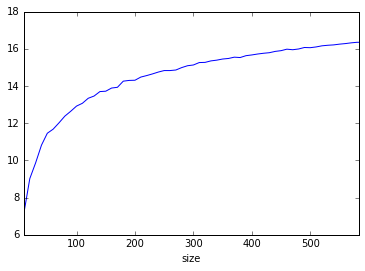

In [33]:
size_rarefaction_df_all['perc_public_prod'].plot()
plt.show()

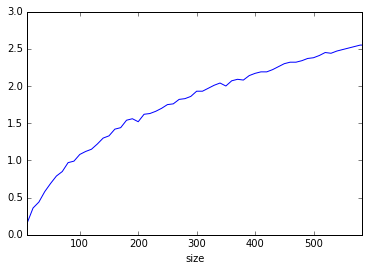

In [36]:
size_rarefaction_df_all['perc_public_non_prod'].plot()
plt.show()

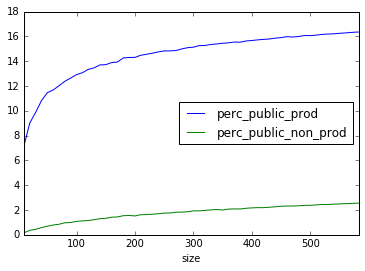

In [37]:
size_rarefaction_df_all[['perc_public_prod','perc_public_non_prod']].plot()
plt.show()

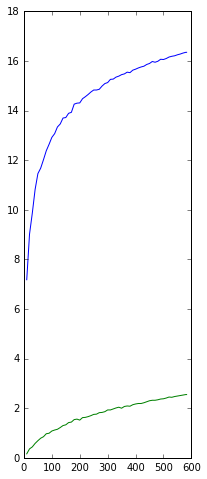

In [44]:
fig=plt.figure(figsize=(3,8))
plt.plot(size_rarefaction_df_all.index,size_rarefaction_df_all['perc_public_prod'])
plt.plot(size_rarefaction_df_all.index,size_rarefaction_df_all['perc_public_non_prod'])
plt.show()